In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import binom,poisson,gamma
from matplotlib.animation import FuncAnimation

In [81]:
pip install openpyxl


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**1. ĐỌC DỮ LIỆU**

In [82]:
data = pd.read_excel('./co2.xlsx')
data.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita),Air conditioners,GDP
0,Afghanistan,AFG,1949,0.001992,NaN,NaN
1,Afghanistan,AFG,1950,0.011266,NaN,NaN
2,Afghanistan,AFG,1951,0.012098,NaN,NaN
3,Afghanistan,AFG,1952,0.011946,NaN,NaN
4,Afghanistan,AFG,1953,0.013685,NaN,NaN


**2. CO2 PHÁT THẢI QUA MỖI NĂM**

(0.0, 5.0)

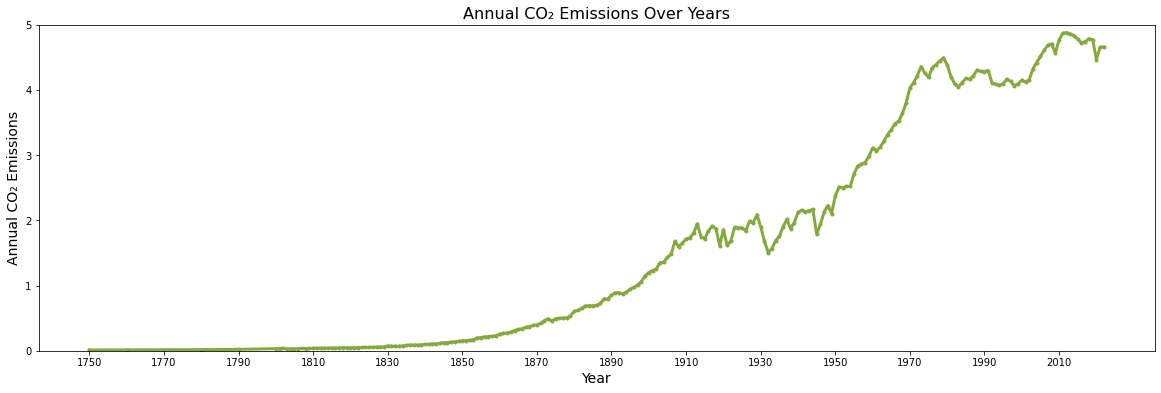

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from ipywidgets import FloatSlider, VBox

df = pd.DataFrame(data)

# Lọc chỉ lấy dữ liệu của World
W_df = df[df['Entity'] == 'World']


# Thiết lập kích thước đồ thị
fig, ax = plt.subplots(figsize=(20, 6))

plt.xticks(range(1750, 2022 + 1, 20))  # Hiển thị mỗi 5 năm

# Vẽ đồ thị ban đầu
line, = ax.plot(W_df['Year'], W_df['Annual CO₂ emissions (per capita)'], marker='.', color='#84A93F', linewidth=3)
ax.set_title('Annual CO₂ Emissions Over Years', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Annual CO₂ Emissions', fontsize=14)
ax.set_ylim(0,5)

In [84]:

specific_years = [1860,1870, 1875,1900, 1916, 1923, 1933, 1943, 1953, 1963, 1973, 1983, 1993, 2003, 2013, 2022]
filtered_df = W_df[W_df['Year'].isin(specific_years)]
print(filtered_df)

      Entity      Code  Year  Annual CO₂ emissions (per capita)  \
26171  World  OWID_WRL  1860                           0.254567   
26181  World  OWID_WRL  1870                           0.397510   
26186  World  OWID_WRL  1875                           0.492460   
26211  World  OWID_WRL  1900                           1.199232   
26227  World  OWID_WRL  1916                           1.840581   
26234  World  OWID_WRL  1923                           1.893368   
26244  World  OWID_WRL  1933                           1.568030   
26254  World  OWID_WRL  1943                           2.150360   
26264  World  OWID_WRL  1953                           2.519000   
26274  World  OWID_WRL  1963                           3.212377   
26284  World  OWID_WRL  1973                           4.357756   
26294  World  OWID_WRL  1983                           4.046541   
26304  World  OWID_WRL  1993                           4.087606   
26314  World  OWID_WRL  2003                           4.32422

**3. Những biến động mạnh của CO2 phát thải qua sự kiện lịch sử**

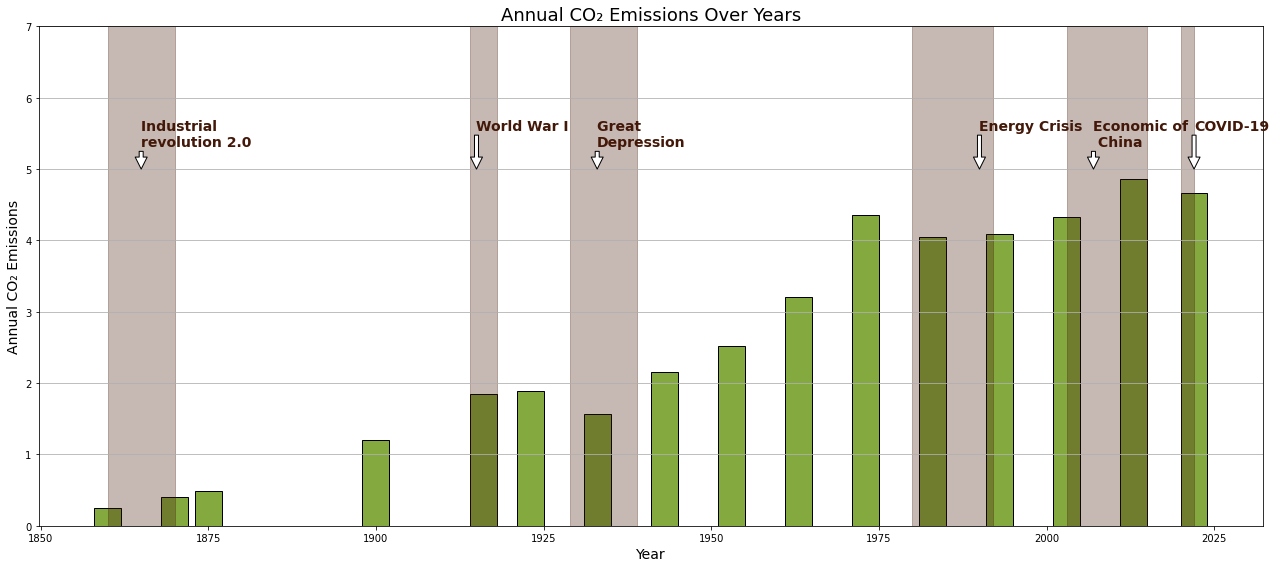

In [85]:

# Tạo figure ban đầu
plt.figure(figsize=(18, 8))
ax = plt.gca()  # Lấy trục hiện tại

# Vẽ bar chart
bars = ax.bar(filtered_df['Year'], filtered_df['Annual CO₂ emissions (per capita)'], color='#84A93F', edgecolor='black',width=4)

# Đặt tiêu đề và nhãn trục
ax.set_title('Annual CO₂ Emissions Over Years', fontsize=18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Annual CO₂ Emissions', fontsize=14)
ax.set_ylim(0, 7)  # Giới hạn trục Y
plt.grid(axis='y')



events = [
    {'start': 1860, 'end': 1870, 'label': 'Industrial \nrevolution 2.0', 'xy': (1865, 5)},
    {'start': 1914, 'end': 1918, 'label': 'World War I', 'xy': (1915, 5)},
    {'start': 1929, 'end': 1939, 'label': 'Great \nDepression', 'xy': (1933, 5)},
    {'start': 1980, 'end': 1992, 'label': 'Energy Crisis', 'xy': (1990, 5)},
    {'start': 2003, 'end': 2015, 'label': 'Economic of \n China', 'xy': (2007, 5)},
    {'start': 2020, 'end': 2022, 'label': 'COVID-19', 'xy': (2022, 5)},
]

# Tô màu nền cho các khoảng thời gian
for event in events:
    ax.axvspan(event['start'], event['end'], color='#431808', alpha=0.3)
    ax.annotate(event['label'], xy=event['xy'] ,xytext=(event['xy'][0], event['xy'][1]+0.7),
                arrowprops=dict(facecolor='white', shrink=0.0004),
                fontsize=14, color='#431808',va='top',fontweight='bold')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

**4. So sánh biểu đồ của các quốc gia có sự phát triển thần tốc về kinh tế**

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, Dropdown, VBox, Button



df = pd.DataFrame(data)

# Lọc dữ liệu cho các quốc gia
entities = df['Entity'].unique()

# Danh sách quốc gia đã chọn
selected_entities = []

# Hàm vẽ đồ thị
def plot_graph(start_year, end_year):
    plt.figure(figsize=(10, 6))
     
    for entity in selected_entities:
        filtered_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year) & (df['Entity'] == entity)]
        sns.lineplot(data=filtered_df, x='Year', y='Annual CO₂ emissions (per capita)', marker='o', label=entity, linewidth=2,)
    
    plt.title('Annual CO₂ Emissions (per capita) Over Years', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Annual CO₂ Emissions (per capita)', fontsize=14)
    plt.xlim(start_year, end_year)
    plt.ylim(0, 5)
    plt.grid(True)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Slider để điều chỉnh khoảng thời gian
year_slider = FloatSlider(value=2022, min=1750, max=2022, step=1, description='End Year:')
start_slider = FloatSlider(value=1750, min=1750, max=2022, step=1, description='Start Year:')
entity_dropdown = Dropdown(options=entities, value='Africa', description='Select Entity:')
add_button = Button(description='Add Country')

# Hàm thêm quốc gia đã chọn vào danh sách
def add_country(b):
    entity = entity_dropdown.value
    if entity not in selected_entities:
        selected_entities.append(entity)
    plot_graph(start_slider.value, year_slider.value)

# Kết nối button với hàm thêm quốc gia
add_button.on_click(add_country)

# Kết nối các widget với hàm cập nhật
start_slider.observe(lambda change: plot_graph(start_slider.value, year_slider.value), names='value')
year_slider.observe(lambda change: plot_graph(start_slider.value, year_slider.value), names='value')

# Hiển thị sliders và dropdown
VBox([entity_dropdown, add_button, start_slider, year_slider])

In [87]:
filtered_df_1 = df[df['Air conditioners'].notna()]
print(filtered_df_1)

       Entity      Code  Year  Annual CO₂ emissions (per capita)  \
3904   Brazil       BRA  1990                           1.450887   
3905   Brazil       BRA  1991                           1.496018   
3906   Brazil       BRA  1992                           1.498395   
3907   Brazil       BRA  1993                           1.541938   
3908   Brazil       BRA  1994                           1.577843   
...       ...       ...   ...                                ...   
26329   World  OWID_WRL  2018                           4.785001   
26330   World  OWID_WRL  2019                           4.770166   
26331   World  OWID_WRL  2020                           4.464730   
26332   World  OWID_WRL  2021                           4.654845   
26333   World  OWID_WRL  2022                           4.658219   

       Air conditioners  GDP  
3904          7240000.0  NaN  
3905          7730000.0  NaN  
3906          7830000.0  NaN  
3907          8460000.0  NaN  
3908          9400000.0  NaN

**5. Đi sâu hơn vào dòng thời gian để nhìn thấy tương quan giữa các dữ liệu**

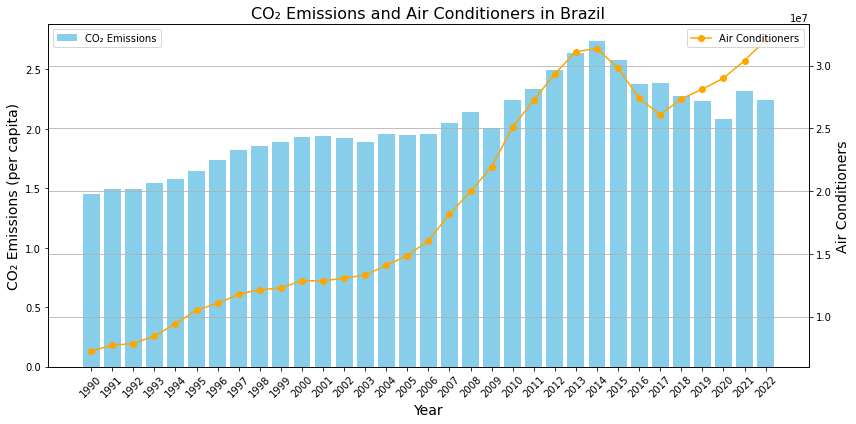

<function __main__.plot_country(country)>

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown


# Lọc các giá trị hợp lệ cho dropdown
valid_entities = filtered_df_1['Entity'].unique().tolist()

# Hàm vẽ biểu đồ
def plot_country(country):
    plt.figure(figsize=(12, 6))

    # Lọc dữ liệu theo quốc gia
    filtered_df_2 = filtered_df_1[filtered_df_1['Entity'] == country]

    # Bar chart cho CO₂ emissions
    ax1 = plt.gca()  # Lấy trục hiện tại
    ax1.bar(filtered_df_2['Year'], filtered_df_2['Annual CO₂ emissions (per capita)'], color='skyblue', label='CO₂ Emissions')
    ax1.set_title(f'CO₂ Emissions and Air Conditioners in {country}', fontsize=16)
    ax1.set_ylabel('CO₂ Emissions (per capita)', fontsize=14)
    ax1.set_xlabel('Year', fontsize=14)
    
    # Thêm xticks theo năm
    ax1.set_xticks(filtered_df_2['Year'])
    ax1.set_xticklabels(filtered_df_2['Year'], rotation=45)

    # Tạo trục y thứ hai cho Air conditioners
    ax2 = ax1.twinx()  # Tạo trục y thứ hai
    air_conditioners_data = filtered_df_2['Air conditioners'].dropna()
    
    if not air_conditioners_data.empty:
        ax2.plot(filtered_df_2['Year'], air_conditioners_data, marker='o', color='orange', label='Air Conditioners')
        ax2.set_ylabel('Air Conditioners', fontsize=14)

    # Thiết lập legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Tạo dropdown để chọn quốc gia
country_dropdown = Dropdown(
    options=valid_entities,
    value=valid_entities[0],  # Chọn giá trị đầu tiên làm giá trị mặc định
    description='Select Country:'
)

# Sử dụng interact để tạo tương tác
interact(plot_country, country=country_dropdown)

### Kết Luận Về Dữ Liệu CO₂ và Tốc Độ Tăng Trưởng

Dữ liệu về phát thải CO₂ trên đầu người qua các năm cho thấy một xu hướng đáng chú ý ở nhiều quốc gia trên thế giới. Sự gia tăng phát thải CO₂ thường đi đôi với sự tăng trưởng kinh tế mạnh mẽ, điều này cho thấy rằng** khi nền kinh tế phát triển, nhu cầu sử dụng năng lượng cũng gia tăng.** Các hoạt động công nghiệp, giao thông và tiêu thụ năng lượng trong sinh hoạt đều góp phần vào việc phát thải khí nhà kính, đặc biệt là CO₂. 

*Trong những thập kỷ gần đây, tốc độ tăng trưởng kinh tế của nhiều quốc gia đã dẫn đến một mức phát thải CO₂ cao hơn, gây ra những tác động tiêu cực đến môi trường*. Biểu đồ cho thấy sự gia tăng này không chỉ ảnh hưởng đến khí hậu mà còn có thể gây ra nhiều hệ lụy nghiêm trọng về sức khỏe cộng đồng và hệ sinh thái.

Một yếu tố đáng lưu ý khác là sự gia tăng số lượng máy điều hòa không khí (AC). Khi nhiệt độ trung bình toàn cầu tăng, nhu cầu về các thiết bị làm mát, như máy điều hòa không khí, cũng tăng theo. **Sự gia tăng này không chỉ làm tăng tiêu thụ điện năng, mà còn dẫn đến phát thải CO₂ từ các nhà máy điện.** Do đó, mặc dù máy điều hòa không khí cung cấp sự thoải mái trong cuộc sống hàng ngày, nhưng chúng cũng góp phần vào cuộc khủng hoảng khí hậu hiện tại.

Tóm lại, để giảm thiểu tác động của phát thải CO₂, cần có những giải pháp bền vững hơn trong phát triển kinh tế và sử dụng năng lượng. Các quốc gia nên thúc đẩy công nghệ xanh, năng lượng tái tạo và nâng cao nhận thức cộng đồng về bảo vệ môi trường. **Sự tương quan giữa tăng trưởng kinh tế, phát thải CO₂ và số lượng máy điều hòa không khí cần được xem xét một cách tổng thể trong các chính sách môi trường và phát triển kinh tế trong tương lai.**